## COVID Metric Data Processing

#### The Data 



#### Significance 




* convert dates to datetime objects 
* uniformize time differences to match daily reporting 
* restrict to contiguous US States and DC
 

In [276]:
# pandas and numpy for working with data
import pandas as pd 
import numpy as np

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
# import daily reports by state 
daily_reports = pd.read_csv("../data/csse_covid_19_daily_reports_us.csv")
daily_reports.head()

Province_State Country_Region          Last_Update      Lat     Long_  \
0         Alabama             US  2021-01-02 05:30:44  32.3182  -86.9023   
1          Alaska             US  2021-01-02 05:30:44  61.3707 -152.4044   
2  American Samoa             US  2021-01-02 05:30:44 -14.2710 -170.1320   
3         Arizona             US  2021-01-02 05:30:44  33.7298 -111.4312   
4        Arkansas             US  2021-01-02 05:30:44  34.9697  -92.3731   

   Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
0     365747    4872   202137.0  158738.0   1.0    7459.375895   
1      46986     206     7165.0   39615.0   2.0    6422.844801   
2          0       0        NaN       0.0  60.0       0.000000   
3     530267    9015    76934.0  444318.0   4.0    7285.171274   
4     229442    3711   199247.0   26484.0   5.0    7602.945718   

   Total_Test_Results  People_Hospitalized  Case_Fatality_Ratio         UID  \
0           1885216.0                  NaN             1.332068  84000001.0   
1           1275750.0                  NaN             0.438428  84000002.0   
2              2140.0                  NaN                  NaN        16.0   
3           5155330.0                  NaN             1.700087  84000004.0   
4           2051488.0                  NaN             1.617402  84000005.0   

  ISO3   Testing_Rate  Hospitalization_Rate  People_Tested  Mortality_Rate  
0  USA   38448.804196                   NaN            NaN             NaN  
1  USA  174391.185778                   NaN            NaN             NaN  
2  ASM    3846.084722                   NaN            NaN             NaN  
3  USA   39551.860582                   NaN            NaN             NaN  
4  USA   67979.497674                   NaN            NaN             NaN

In [333]:
daily_reports.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'Total_Test_Results', 'People_Hospitalized', 'Case_Fatality_Ratio',
       'UID', 'ISO3', 'Testing_Rate', 'Hospitalization_Rate', 'People_Tested',
       'Mortality_Rate'],
      dtype='object')

## Restricting to the Continental Unites States 

To analyze the transmission of COVID between regions in the US and consider the effects of neighboring regions we first restrict the data to regions in the Continental US. 

The daily reports data reports COVID numbers for all 50 states, plus the District of Columbia, several US territories (e.g. Guam, Puerto Rico) and two cruise ships (Diamond Princess and Grand Princess). The following cell selects only the data associated with the 48 continental US states and the District of Columbia (D.C.). 

In [278]:
# show all provinces/states included in data set
daily_reports['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Recovered'], dtype=object)

In [279]:
# the following are the provinces/states to exclude 
excluded_regions = ['Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'American Samoa', # territories
                    'Diamond Princess', 'Grand Princess', 'Guam', 'Recovered', # other 
                    'Alaska', 'Hawaii'] # non continuous states
# this creates a list of the continental US states and DC in the list 
continguous_US = list(set(list(daily_reports['Province_State'].unique())) - set(excluded_regions))
assert len(continguous_US) == 49 # 50 states + DC - Hawaii, Alaska


# create a dataframe with only data for these continental regions 
cont_daily_reports = daily_reports[daily_reports['Province_State'].isin(continguous_US)]
assert (set(cont_daily_reports['Province_State'].unique()) == set(continguous_US))

## Examine Columns

In [280]:
#check data type for date
cont_daily_reports.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                    float64
Incident_Rate           float64
Total_Test_Results      float64
People_Hospitalized     float64
Case_Fatality_Ratio     float64
UID                     float64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
People_Tested           float64
Mortality_Rate          float64
dtype: object

The `Last_Update` column contains a date but is stored as an object, we convert this to DateTime to work with the data as a date. The documentation states that this value represents a date and time in UTC. 

In [281]:
cont_daily_reports.loc[:,'Last_Update'] = pd.to_datetime(cont_daily_reports['Last_Update'], utc=True)

/Users/anyamichaelsen/Library/Python/3.9/lib/python/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [282]:
## Country_Region
display(cont_daily_reports['Country_Region'].value_counts())
display(cont_daily_reports['ISO3'].value_counts())

US    17346
Name: Country_Region, dtype: int64

USA    17346
Name: ISO3, dtype: int64

In [283]:
# for each province_state count the unique FIPS and UID associated with it and return summary of those counts
display(cont_daily_reports[['Province_State','FIPS']].groupby('Province_State').nunique().value_counts())
display(cont_daily_reports[['Province_State','UID']].groupby('Province_State').nunique().value_counts())

FIPS
1       49
dtype: int64

UID
1      49
dtype: int64

Since all values are the same in this dataset for `Country_Region` and `ISO3`, we can drop these columns. Observe there is exactly one FIPS and UID per Province_State in our dataframe, this data is redundant and can be removed from our dataframe without loss of information. 

In [284]:
cont_daily_reports = cont_daily_reports.drop(columns=['Country_Region','ISO3','FIPS','UID'])
cont_daily_reports.head()

Province_State               Last_Update      Lat     Long_  Confirmed  \
0        Alabama 2021-01-02 05:30:44+00:00  32.3182  -86.9023     365747   
3        Arizona 2021-01-02 05:30:44+00:00  33.7298 -111.4312     530267   
4       Arkansas 2021-01-02 05:30:44+00:00  34.9697  -92.3731     229442   
5     California 2021-01-02 05:30:44+00:00  36.1162 -119.6816    2365024   
6       Colorado 2021-01-02 05:30:44+00:00  39.0598 -105.3111     337161   

   Deaths  Recovered     Active  Incident_Rate  Total_Test_Results  \
0    4872   202137.0   158738.0    7459.375895           1885216.0   
3    9015    76934.0   444318.0    7285.171274           5155330.0   
4    3711   199247.0    26484.0    7602.945718           2051488.0   
5   26363        NaN  2309915.0    5912.603297          33058311.0   
6    4873    18102.0   314186.0    5854.774381           4444206.0   

   People_Hospitalized  Case_Fatality_Ratio  Testing_Rate  \
0                  NaN             1.332068  38448.804196   
3                  NaN             1.700087  39551.860582   
4                  NaN             1.617402  67979.497674   
5                  NaN             1.125160  83666.036710   
6                  NaN             1.445304  77173.289416   

   Hospitalization_Rate  People_Tested  Mortality_Rate  
0                   NaN            NaN             NaN  
3                   NaN            NaN             NaN  
4                   NaN            NaN             NaN  
5                   NaN            NaN             NaN  
6                   NaN            NaN             NaN

**FINISH ANALYSIS OF OTHER COLUMNS HERE** 

create lists for numerics of interest (`covid_metrics`) 

how many NANs are there in each column?? 

Next let's examine the frequency of null values in the remaining data. Below we compute the percentage of null values for each column. 

In [285]:
cont_daily_reports.isna().sum()*100/cont_daily_reports.shape[0]

Province_State           0.000000
Last_Update              0.000000
Lat                      0.000000
Long_                    0.000000
Confirmed                0.000000
Deaths                   0.000000
Recovered               23.037011
Active                   7.062147
Incident_Rate            0.000000
Total_Test_Results      59.604520
People_Hospitalized     71.711057
Case_Fatality_Ratio     59.604520
Testing_Rate             0.000000
Hospitalization_Rate    71.711057
People_Tested           40.395480
Mortality_Rate          40.395480
dtype: float64

Let's check if there are any differences by state. Below we create a function that takes a dataframe (will be a group) and computes null percentages for each column in the dataframe. We then apply this as an aggregating function to the dataframe grouped by `Province_State` to get null percentages of each column by region. For columns with no nulls, this will not vary by state so these can be excluded. 

In [286]:
def compute_null_percentage(data):
    return data.isna().sum()*100/data.shape[0]

In [287]:
null_percents_by_state = cont_daily_reports.groupby('Province_State').agg(compute_null_percentage).sort_index()
null_percents_by_state.loc[:,null_percents_by_state.any()]

Recovered    Active  Total_Test_Results  \
Province_State                                                  
Alabama               16.949153  7.062147            59.60452   
Arizona               11.016949  7.062147            59.60452   
Arkansas               7.062147  7.062147            59.60452   
California            98.587571  7.062147            59.60452   
Colorado              14.124294  7.062147            59.60452   
Connecticut           15.819209  7.062147            59.60452   
Delaware              19.774011  7.062147            59.60452   
District of Columbia   7.062147  7.062147            59.60452   
Florida               98.587571  7.062147            59.60452   
Georgia               98.587571  7.062147            59.60452   
Idaho                  8.474576  7.062147            59.60452   
Illinois              98.587571  7.062147            59.60452   
Indiana               22.881356  7.062147            59.60452   
Iowa                   7.062147  7.062147            59.60452   
Kansas                15.254237  7.062147            59.60452   
Kentucky               7.062147  7.062147            59.60452   
Louisiana             10.451977  7.062147            59.60452   
Maine                  7.062147  7.062147            59.60452   
Maryland               7.062147  7.062147            59.60452   
Massachusetts         29.096045  7.062147            59.60452   
Michigan               7.062147  7.062147            59.60452   
Minnesota              7.344633  7.062147            59.60452   
Mississippi           11.864407  7.062147            59.60452   
Missouri              98.305085  7.062147            59.60452   
Montana                7.062147  7.062147            59.60452   
Nebraska              20.338983  7.062147            59.60452   
Nevada                42.372881  7.062147            59.60452   
New Hampshire          7.062147  7.062147            59.60452   
New Jersey            14.971751  7.062147            59.60452   
New Mexico             7.062147  7.062147            59.60452   
New York              10.451977  7.062147            59.60452   
North Carolina        17.231638  7.062147            59.60452   
North Dakota           7.062147  7.062147            59.60452   
Ohio                  28.531073  7.062147            59.60452   
Oklahoma               7.062147  7.062147            59.60452   
Oregon                25.423729  7.062147            59.60452   
Pennsylvania          16.949153  7.062147            59.60452   
Rhode Island          10.451977  7.062147            59.60452   
South Carolina         8.757062  7.062147            59.60452   
South Dakota           7.062147  7.062147            59.60452   
Tennessee              7.062147  7.062147            59.60452   
Texas                  7.062147  7.062147            59.60452   
Utah                   7.344633  7.062147            59.60452   
Vermont                8.474576  7.062147            59.60452   
Virginia              11.016949  7.062147            59.60452   
Washington            98.587571  7.062147            59.60452   
West Virginia          7.062147  7.062147            59.60452   
Wisconsin             12.146893  7.062147            59.60452   
Wyoming                7.062147  7.062147            59.60452   

                      People_Hospitalized  Case_Fatality_Ratio  \
Province_State                                                   
Alabama                         61.016949             59.60452   
Arizona                         61.299435             59.60452   
Arkansas                        61.299435             59.60452   
California                      95.480226             59.60452   
Colorado                        61.016949             59.60452   
Connecticut                     61.864407             59.60452   
Delaware                        95.480226             59.60452   
District of Columbia            95.762712             59.60452   
Florida                         61.016949     

From the table above we see that for some metrics, such as `Total_Test_Results`, the amount of missing data is very consistent regardless of region. This might be due to a change in reporting over time (i.e. the metric might have been added part of the way through the date range, with nulls backfilled for previous dates). Let's restrict our attention to those values that less consistent. 

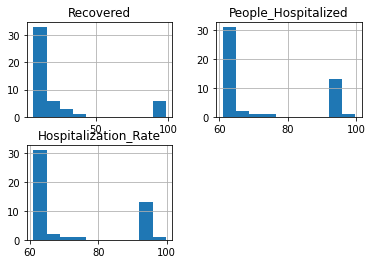

In [288]:
null_percents_by_state.loc[:,null_percents_by_state.std()>0.001].hist();

For each of the three variables we see two groups of values for the null percentages. 

**DO MORE WITH THIS?** 

    People_Hospitalized - Total number of people hospitalized. (Nullified on Aug 31, see Issue #3083)

Does this mean the missing data is from after Aug 31? 

## Uniformizing Timeseries Differences

For analyzing the spread of COVID in time we first want to ensure that the data are regularly distributed in time. In the next few cells we will see that for the most part, there is one entry per Province_State.

Since this data is reported daily, we expect to see one row per Province_State per day. Indeed looking at a few rows from California seems to align with this. 

In [289]:
cont_daily_reports[cont_daily_reports['Province_State']=='California'].sort_values('Last_Update').head()

Province_State               Last_Update      Lat     Long_  Confirmed  \
5224     California 2020-04-12 23:18:15+00:00  36.1162 -119.6816      22805   
5284     California 2020-04-13 23:07:54+00:00  36.1162 -119.6816      23946   
5343     California 2020-04-14 23:33:31+00:00  36.1162 -119.6816      25373   
5402     California 2020-04-15 22:56:51+00:00  36.1162 -119.6816      26699   
5461     California 2020-04-16 23:30:51+00:00  36.1162 -119.6816      27687   

      Deaths  Recovered   Active  Incident_Rate  Total_Test_Results  \
5224     640        NaN  22155.0      58.137726                 NaN   
5284     714        NaN  23217.0      61.035048                 NaN   
5343     767        NaN  24589.0      64.669453                 NaN   
5402     860        NaN  25826.0      68.061564                 NaN   
5461     956        NaN  26721.0      70.589069                 NaN   

      People_Hospitalized  Case_Fatality_Ratio  Testing_Rate  \
5224               5234.0                  NaN    485.423869   
5284               3015.0                  NaN    486.836823   
5343               5163.0                  NaN    515.723328   
5402               5163.0                  NaN    552.138790   
5461               5031.0                  NaN    628.433237   

      Hospitalization_Rate  People_Tested  Mortality_Rate  
5224             22.961176       190328.0        2.812020  
5284             12.598721       190882.0        2.987756  
5343             20.362044       202208.0        3.028869  
5402             19.347223       216486.0        3.226411  
5461             18.177548       246400.0        3.457745

However if we extract just the date from the `Last_Update` and look at the differences between sequential rows (once ordered by date), we see there are many cases of a 2 day jump and 1 instance of two reports on a single day. 

In [290]:
# extract date only from UTC datetime
cont_daily_reports['UTC_Date_Last_Update'] = cont_daily_reports['Last_Update'].dt.date

In [291]:
def compute_day_diffs(data, date_col):
    '''
    This function takes a dataframe with a date column and returns the 
    dataframe with an additional 
    '''
    # sort by the given date column
    sorted_data = data.sort_values(date_col)
    # take sequential differences and relabel column to 'Days_Diff', note first entry will be NaT
    day_diffs = sorted_data[[date_col]].diff().rename(columns={date_col:'Days_Diff'})
    # merge back into initial data 
    sorted_data = sorted_data.merge(day_diffs, how="inner", left_index=True, right_index=True)
    return sorted_data

def extract_unusual_daily_diffs(data, date_col):
    daily_diff_data = compute_day_diffs(data, date_col)
    # select only rows that are not of daily frequency or the first row (always NaT/Na)
    unusual_date_diffs = daily_diff_data[(daily_diff_data['Days_Diff']!=pd.Timedelta('1D')) & (~ daily_diff_data['Days_Diff'].isna())]
    return unusual_date_diffs

unusual_date_diff_data = cont_daily_reports.groupby('Province_State').apply(extract_unusual_daily_diffs, 
                                                                            date_col='UTC_Date_Last_Update')
unusual_date_diff_data = unusual_date_diff_data.set_index(unusual_date_diff_data.index.droplevel('Province_State'))
unusual_date_diff_data[['Province_State','Last_Update','UTC_Date_Last_Update','Days_Diff']].head()


Province_State               Last_Update UTC_Date_Last_Update  \
5869        Alabama 2020-04-24 03:33:00+00:00           2020-04-24   
5872        Arizona 2020-04-24 03:33:00+00:00           2020-04-24   
5873       Arkansas 2020-04-24 03:33:00+00:00           2020-04-24   
5874     California 2020-04-24 03:33:00+00:00           2020-04-24   
5875       Colorado 2020-04-24 03:33:00+00:00           2020-04-24   

            Days_Diff  
5869  2 days, 0:00:00  
5872  2 days, 0:00:00  
5873  2 days, 0:00:00  
5874  2 days, 0:00:00  
5875  2 days, 0:00:00

In [292]:
unusual_date_diff_data[['Days_Diff']].value_counts()

Days_Diff
2 days       50
0 days        1
dtype: int64

From the tables above we see there are 50 2 day jumps and also a single 0 day jump (2 reports on the same day). The next few cells will investigate this further. Using the dates from the unusual rows we can look at the data around that time to see what is going on. 

In [293]:
def data_between_dates(data, date_col, start_date='2020-01-01', end_date='2021-04-03'):
    '''Takes a dataframe and a date column and returns rows where the date column lies between given dates'''
    return data[(data[date_col] >= pd.to_datetime(start_date)) & (data[date_col] <= pd.to_datetime(end_date))]

In [294]:
data_between_dates(cont_daily_reports[cont_daily_reports['Province_State'].isin(['California','New York'])],
                   date_col = 'UTC_Date_Last_Update', start_date = '2020-04-22', end_date = '2020-04-25').sort_values('Province_State')

/Users/anyamichaelsen/Library/Python/3.9/lib/python/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Province_State               Last_Update      Lat     Long_  Confirmed  \
5815     California 2020-04-22 23:40:26+00:00  36.1162 -119.6816      37731   
5874     California 2020-04-24 03:33:00+00:00  36.1162 -119.6816      39946   
5933     California 2020-04-25 06:32:46+00:00  36.1162 -119.6816      41803   
5846       New York 2020-04-22 23:40:26+00:00  42.1657  -74.9481     263292   
5905       New York 2020-04-24 03:33:00+00:00  42.1657  -74.9481     263460   
5964       New York 2020-04-25 06:32:46+00:00  42.1657  -74.9481     271590   

      Deaths  Recovered    Active  Incident_Rate  Total_Test_Results  \
5815    1421        NaN   35923.0      95.244362                 NaN   
5874    1533        NaN   38028.0     100.898731                 NaN   
5933    1621        NaN   39734.0     105.474255                 NaN   
5846   19413    23887.0  243879.0    1561.542077                 NaN   
5905   20973    23887.0  242487.0    1562.538458                 NaN   
5964   21411    23887.0  250179.0    1610.756167                 NaN   

      People_Hospitalized  Case_Fatality_Ratio  Testing_Rate  \
5815               4984.0                  NaN   1186.797699   
5874               4929.0                  NaN   1229.568906   
5933               4880.0                  NaN   1260.368256   
5846              57103.0                  NaN   3973.554395   
5905              57103.0                  NaN   4127.388459   
5964              57103.0                  NaN   4333.402032   

      Hospitalization_Rate  People_Tested  Mortality_Rate UTC_Date_Last_Update  
5815             13.346187       465327.0        3.805163           2020-04-22  
5874             12.459240       482097.0        3.875028           2020-04-24  
5933             11.800266       494173.0        3.919720           2020-04-25  
5846             21.688088       669982.0        7.373183           2020-04-22  
5905             21.674258       695920.0        7.960601           2020-04-24  
5964             21.025443       730656.0        7.883575           2020-04-25

We see above that the times for the reports changes significantly from around 23:30 UTC (almost midnight) to 3:30-6:30 UTC (early morning) between April 22, 2020 and April 24, 2020. Reviewing the [documentation](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#time-series-summary-csse_covid_19_time_series), there is the following note: 

    Files on and after April 23, once per day between 03:30 and 04:00 UTC.
    Files from February 2 to April 22: once per day around 23:59 UTC.
    
Since the times are in UTC, but the data is being reported for US states, an early morning UTC time actually corresponds to a time _the previous day_ in the US. So the missing April 23rd data is actually the April 24th data. Each province/state is probably encountering the same time change issue, accounting for 49 (number of distinct provinces/states in dataframe) of the 51 unusual time differences. We can fix this for all regions and then check what differences remain. 

In [295]:
# function shifts datetime up one day for entries after April 22, 2020
def add_day_after_date(datetime):    
    if datetime > pd.to_datetime('2020-04-22'):
        return datetime - pd.DateOffset(1)
    return datetime

cont_daily_reports['UTC_Adjusted_Date'] = cont_daily_reports['UTC_Date_Last_Update'].apply(add_day_after_date)

/var/folders/8n/v409d_pd7m18zx23825fgzsc0000gn/T/ipykernel_64910/866926750.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if datetime > pd.to_datetime('2020-04-22'):


In [296]:
remaining_unusual_date_diff_data = cont_daily_reports.groupby('Province_State').apply(extract_unusual_daily_diffs, 
                                                                            date_col='UTC_Adjusted_Date')
remaining_unusual_date_diff_data = remaining_unusual_date_diff_data.set_index(remaining_unusual_date_diff_data.index.droplevel('Province_State'))
remaining_unusual_date_diff_data[['Province_State','Last_Update','UTC_Date_Last_Update','UTC_Adjusted_Date','Days_Diff']].head()

Province_State               Last_Update UTC_Date_Last_Update  \
5290        Florida 2020-04-14 00:42:00+00:00           2020-04-14   
5349        Florida 2020-04-14 23:33:31+00:00           2020-04-14   

     UTC_Adjusted_Date Days_Diff  
5290        2020-04-14    2 days  
5349        2020-04-14    0 days

The remaining two issues are with Florida, which has at least two entries on April 14, 2020. Let's again examine the entries close to this. 

In [297]:
data_between_dates(cont_daily_reports[cont_daily_reports['Province_State']=='Florida'],
                   date_col = 'UTC_Adjusted_Date', start_date = '2020-04-12', end_date = '2020-04-15').sort_values('Province_State')

Province_State               Last_Update      Lat    Long_  Confirmed  \
5230        Florida 2020-04-12 23:18:15+00:00  27.7663 -81.6868      19895   
5290        Florida 2020-04-14 00:42:00+00:00  27.7663 -81.6868      21019   
5349        Florida 2020-04-14 23:33:31+00:00  27.7663 -81.6868      21628   
5408        Florida 2020-04-15 22:56:51+00:00  27.7663 -81.6868      22511   

      Deaths  Recovered    Active  Incident_Rate  Total_Test_Results  \
5230     461        NaN   19434.0      93.700227                 NaN   
5290     499        NaN  122520.0     579.387193                 NaN   
5349     571        NaN   21057.0     101.862202                 NaN   
5408     596        NaN   21915.0     106.020900                 NaN   

      People_Hospitalized  Case_Fatality_Ratio  Testing_Rate  \
5230               2772.0                  NaN    860.718651   
5290               2833.0                  NaN    924.083459   
5349               3060.0                  NaN    956.924459   
5408               3344.0                  NaN   1005.571337   

      Hospitalization_Rate  People_Tested  Mortality_Rate  \
5230             13.933149       182753.0        2.317165   
5290              2.302896       196207.0        0.405628   
5349             14.148326       203180.0        2.640096   
5408             14.854960       213509.0        2.647595   

     UTC_Date_Last_Update UTC_Adjusted_Date  
5230           2020-04-12        2020-04-12  
5290           2020-04-14        2020-04-14  
5349           2020-04-14        2020-04-14  
5408           2020-04-15        2020-04-15

Both unusual time differences are coming from the fact that row 5290 has a date of 2020-04-14 instead of 2020-04-13 as we might expect. Examining the time for this entry, it is just after midnight. Since entries before April 23 are expected to be logged close to midnight for that day, this appears to be a late entry, reporting data for Florida for April 13, 2020 but labeled for the next day in the dataset. To fix this, we can manually alter the day for this Florida entry to match the (likely) intended day the data represents. 

In [298]:
# manually adjust Florida's late date entry 
cont_daily_reports.loc[5290,'UTC_Adjusted_Date'] = pd.to_datetime('2020-04-13')

We can now check that there are no unusual time jumps remaining. Passing the following check verifies that all rows are 'daily', i.e. there is a 1 day gap between all sequential rows per state/province. 

In [299]:
remaining_unusual_date_diff_data = cont_daily_reports.groupby('Province_State').apply(extract_unusual_daily_diffs, 
                                                                            date_col='UTC_Adjusted_Date')
remaining_unusual_date_diff_data = remaining_unusual_date_diff_data.set_index(remaining_unusual_date_diff_data.index.droplevel('Province_State'))
assert remaining_unusual_date_diff_data.shape[0] == 0

Now that we have created a date column to represent the local date for each row, we can remove our intermediate date columns and relabel our final column. 

In [300]:
cont_daily_reports = cont_daily_reports.drop(columns = ['Last_Update','UTC_Date_Last_Update'])
cont_daily_reports = cont_daily_reports.rename(columns={'UTC_Adjusted_Date':'Date'})
cont_daily_reports.head()

Province_State      Lat     Long_  Confirmed  Deaths  Recovered     Active  \
0        Alabama  32.3182  -86.9023     365747    4872   202137.0   158738.0   
3        Arizona  33.7298 -111.4312     530267    9015    76934.0   444318.0   
4       Arkansas  34.9697  -92.3731     229442    3711   199247.0    26484.0   
5     California  36.1162 -119.6816    2365024   26363        NaN  2309915.0   
6       Colorado  39.0598 -105.3111     337161    4873    18102.0   314186.0   

   Incident_Rate  Total_Test_Results  People_Hospitalized  \
0    7459.375895           1885216.0                  NaN   
3    7285.171274           5155330.0                  NaN   
4    7602.945718           2051488.0                  NaN   
5    5912.603297          33058311.0                  NaN   
6    5854.774381           4444206.0                  NaN   

   Case_Fatality_Ratio  Testing_Rate  Hospitalization_Rate  People_Tested  \
0             1.332068  38448.804196                   NaN            NaN   
3             1.700087  39551.860582                   NaN            NaN   
4             1.617402  67979.497674                   NaN            NaN   
5             1.125160  83666.036710                   NaN            NaN   
6             1.445304  77173.289416                   NaN            NaN   

   Mortality_Rate       Date  
0             NaN 2021-01-01  
3             NaN 2021-01-01  
4             NaN 2021-01-01  
5             NaN 2021-01-01  
6             NaN 2021-01-01

Now that we have uniformized our date data. Let's extract the day of week as well. 

In [301]:
cont_daily_reports['Day_of_Wk'] = cont_daily_reports['Date'].dt.day_name()
cont_daily_reports.head()

Province_State      Lat     Long_  Confirmed  Deaths  Recovered     Active  \
0        Alabama  32.3182  -86.9023     365747    4872   202137.0   158738.0   
3        Arizona  33.7298 -111.4312     530267    9015    76934.0   444318.0   
4       Arkansas  34.9697  -92.3731     229442    3711   199247.0    26484.0   
5     California  36.1162 -119.6816    2365024   26363        NaN  2309915.0   
6       Colorado  39.0598 -105.3111     337161    4873    18102.0   314186.0   

   Incident_Rate  Total_Test_Results  People_Hospitalized  \
0    7459.375895           1885216.0                  NaN   
3    7285.171274           5155330.0                  NaN   
4    7602.945718           2051488.0                  NaN   
5    5912.603297          33058311.0                  NaN   
6    5854.774381           4444206.0                  NaN   

   Case_Fatality_Ratio  Testing_Rate  Hospitalization_Rate  People_Tested  \
0             1.332068  38448.804196                   NaN            NaN   
3             1.700087  39551.860582                   NaN            NaN   
4             1.617402  67979.497674                   NaN            NaN   
5             1.125160  83666.036710                   NaN            NaN   
6             1.445304  77173.289416                   NaN            NaN   

   Mortality_Rate       Date Day_of_Wk  
0             NaN 2021-01-01    Friday  
3             NaN 2021-01-01    Friday  
4             NaN 2021-01-01    Friday  
5             NaN 2021-01-01    Friday  
6             NaN 2021-01-01    Friday

## Feature Engineering

The data reported here are cumulative raw counts. To get a picture of how COVID numbers are changing over time we will want to take differences to get daily additional counts. Given variance in reporting (e.g. cases are underreported on weekends), we will also smooth these daily counts by taking a 7 day rolling average. 

To compare these daily counts between states we also need to scale the data to be comparable. To accomplish this, we import population data for each state and divide the counts by the population to get rates for each state, which can be better compared between regions. 

In [302]:
# create lists with groups of covid metrics labels (split by processing type)

# initial raw cumulative counts
covid_metrics = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Total_Test_Results', 'People_Hospitalized']

# proportions derived from cumulative counts
covid_metrics_rates = [metric + "_rate" for metric in covid_metrics]
# daily counts from differences of raw cumulative counts
covid_metrics_diffs = [metric + "_diff" for metric in covid_metrics]
# proportions of daily counts 
covid_metrics_rates_diffs = [metric + "_rate_diff" for metric in covid_metrics]
# 7 day rolling averages of daily count proportions  
covid_metrics_diffs_rates_rolling_avg_7D = [metric + "_rate_diff_rolling_avg_7D" for metric in covid_metrics]

# initial rates data 
covid_rates = ['Incident_Rate','Case_Fatality_Ratio','Testing_Rate','Hospitalization_Rate']

In [303]:
# import data state population data from https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state
population_data = pd.read_csv('../data/2019_Census_US_Population_Data_By_State_Lat_Long.csv')
population_data = population_data.rename(columns = {'STATE':'State', 'POPESTIMATE2019': 'Total Pop'})
population_data = population_data.drop(columns = ['lat','long'])
population_data.head(2)

State  Total Pop
0  Alabama    4903185
1   Alaska     731545

In [304]:
# merge population data into daily_counts dataframe 
cont_daily_reports = cont_daily_reports.merge(population_data, how='left', left_on='Province_State', right_on='State')

In [305]:
# import methods for data processing from script 
from utility_methods import create_proportion, create_proportions, create_diff, create_diffs
from utility_methods import create_rolling_average_by_time, create_rolling_averages_by_time

# define helper functions for pipeline of data processing 
def load_state_data(state):
    return cont_daily_reports[cont_daily_reports["Province_State"]==state]


def apply_pipeline_to_state(data):
    return (data.pipe(create_proportions, 
                      cols = covid_metrics, 
                      total_col = 'Total Pop')
                .pipe(create_diffs, cols=covid_metrics)
                .pipe(create_diffs, cols=covid_metrics_rates)
                .pipe(create_rolling_averages_by_time, 
                    cols = covid_metrics_rates_diffs,
                    window_offset = '7D')
                .pipe(create_rolling_averages_by_time, 
                    cols = covid_metrics_diffs,
                    window_offset = '7D')
            )

In [306]:
def plot_states_over_time(data, state_names, feature_col, time_col="Date"):
    for state in state_names:
        state_data = data[data['Province_State']==state]
        sns.lineplot(data=state_data, x=time_col, y=feature_col);
    plt.legend(labels=state_names);

In [307]:
# apply the processing pipeline to the dataframe, state by state 
processed_data = cont_daily_reports.groupby('Province_State').apply(apply_pipeline_to_state)
processed_data = processed_data.set_index(processed_data.index.droplevel('Province_State'))

In [308]:
california_data = processed_data[processed_data['Province_State']=='California']
california_data[['Date'] + covid_metrics + covid_metrics_rates + covid_metrics_diffs_rates_rolling_avg_7D].sort_values('Date').head()

Date  Confirmed  Deaths  Recovered   Active  Total_Test_Results  \
0 2020-04-12      22805     640        NaN  22155.0                 NaN   
1 2020-04-13      23946     714        NaN  23217.0                 NaN   
2 2020-04-14      25373     767        NaN  24589.0                 NaN   
3 2020-04-15      26699     860        NaN  25826.0                 NaN   
4 2020-04-16      27687     956        NaN  26721.0                 NaN   

   People_Hospitalized  Confirmed_rate  Deaths_rate  Recovered_rate  \
0               5234.0        0.000577     0.000016             NaN   
1               3015.0        0.000606     0.000018             NaN   
2               5163.0        0.000642     0.000019             NaN   
3               5163.0        0.000676     0.000022             NaN   
4               5031.0        0.000701     0.000024             NaN   

   Active_rate  Total_Test_Results_rate  People_Hospitalized_rate  \
0     0.000561                      NaN                  0.000132   
1     0.000588                      NaN                  0.000076   
2     0.000622                      NaN                  0.000131   
3     0.000654                      NaN                  0.000131   
4     0.000676                      NaN                  0.000127   

   Confirmed_rate_diff_rolling_avg_7D  Deaths_rate_diff_rolling_avg_7D  \
0                                 NaN                              NaN   
1                            0.000029                         0.000002   
2                            0.000032                         0.000002   
3                            0.000033                         0.000002   
4                            0.000031                         0.000002   

   Recovered_rate_diff_rolling_avg_7D  Active_rate_diff_rolling_avg_7D  \
0                                 NaN                              NaN   
1                                 NaN                         0.000027   
2                                 NaN                         0.000031   
3                                 NaN                         0.000031   
4                                 NaN                         0.000029   

   Total_Test_Results_rate_diff_rolling_avg_7D  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   People_Hospitalized_rate_diff_rolling_avg_7D  
0                                           NaN  
1                                 -5.615984e-05  
2                                 -8.984562e-07  
3                                 -5.989708e-07  
4                                 -1.284413e-06

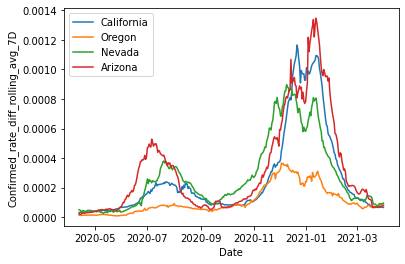

In [331]:
# plot confirmed case numbers for CA and adjacent states
plot_states_over_time(processed_data, ['California','Oregon','Nevada','Arizona'], 'Confirmed_rate_diff_rolling_avg_7D')

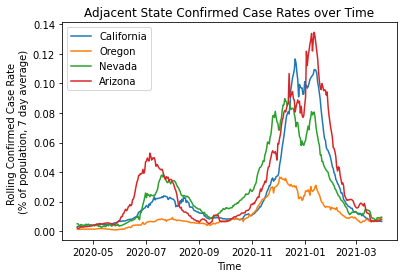

In [332]:
# RECREATE PLOT FOR REPORT 
plotting_data  = processed_data.copy()
plotting_data['conf_rate_rolling_avg_perc'] = plotting_data['Confirmed_rate_diff_rolling_avg_7D']*100
plot_states_over_time(plotting_data, ['California','Oregon','Nevada','Arizona'], 'conf_rate_rolling_avg_perc')
plt.title('Adjacent State Confirmed Case Rates over Time');
plt.xlabel('Time');
plt.ylabel('Rolling Confirmed Case Rate \n(% of population, 7 day average)');
plt.savefig(fname="../figures/adjacent_state_case_rate.png")

### Case_Fatality/Mortality Rates 

The features `Case_Fatality_Ratio` and `Mortality_Rate` seems to be related, possibly overlapping features. The former appears in the documentation as "Number recorded deaths * 100/ Number confirmed cases." but the latter is absent. The following explores the overlap of these variables, showing that `Case_Fatality_Ratio` is a replacement for `Mortality Ratio`. 

In [310]:
print("Null Values in `Case_Fatality_Ratio`:",processed_data['Case_Fatality_Ratio'].isna().sum())
print("Null Values in `Mortality_Rate`     :",processed_data['Mortality_Rate'].isna().sum())

Null Values in `Case_Fatality_Ratio`: 10339
Null Values in `Mortality_Rate`     : 7007


There are lots of null values in both of these columns. Let's take a peak at the data to see what's going on. 

In [311]:
processed_data[['Date','Case_Fatality_Ratio','Mortality_Rate']]

Date  Case_Fatality_Ratio  Mortality_Rate
0   2020-04-12                  NaN        2.610160
1   2020-04-13                  NaN        2.651312
2   2020-04-14                  NaN        2.883886
3   2020-04-15                  NaN        2.895706
4   2020-04-16                  NaN        3.060990
..         ...                  ...             ...
349 2021-03-27             1.240053             NaN
350 2021-03-28             1.240053             NaN
351 2021-03-29             1.236875             NaN
352 2021-03-30             1.235863             NaN
353 2021-03-31             1.243118             NaN

[17346 rows x 3 columns]

Since the data is ordered by time, and the nulls seem to switch columns, these may be overlapping metrics. 

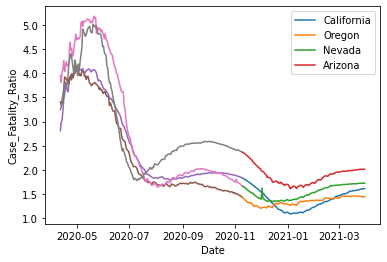

In [312]:
# plot both metrics over time
plot_states_over_time(processed_data, ['California','Oregon','Nevada','Arizona'], 'Case_Fatality_Ratio')
plot_states_over_time(processed_data, ['California','Oregon','Nevada','Arizona'], 'Mortality_Rate')

Since the lines match up, we conclude that `Mortality_Rate` is the original label for `Case_Fatality_Ratio` and these columns can be merged to get a single metric for the entirely of the time represented by the data. 

Remaining Null Values in `Case_Fatality_Ratio`: 0


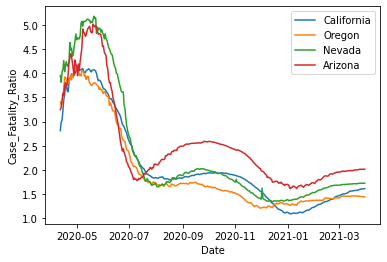

In [313]:
processed_data['Case_Fatality_Ratio'] = processed_data['Case_Fatality_Ratio'].fillna(processed_data['Mortality_Rate'])
print("Remaining Null Values in `Case_Fatality_Ratio`:",processed_data['Case_Fatality_Ratio'].isna().sum())
processed_data = processed_data.drop(columns=['Mortality_Rate'])
plot_states_over_time(processed_data, ['California','Oregon','Nevada','Arizona'], 'Case_Fatality_Ratio')

## Age-Binned COVID Data

In [334]:
deaths_by_feature = pd.read_csv("../data/cdc_death_counts_by_sex_age_state.csv")
deaths_by_feature.head()

Data As Of  Start Date    End Date     Group  Year  Month          State  \
0  03/31/2021  01/01/2020  03/27/2021  By Total   NaN    NaN  United States   
1  03/31/2021  01/01/2020  03/27/2021  By Total   NaN    NaN  United States   
2  03/31/2021  01/01/2020  03/27/2021  By Total   NaN    NaN  United States   
3  03/31/2021  01/01/2020  03/27/2021  By Total   NaN    NaN  United States   
4  03/31/2021  01/01/2020  03/27/2021  By Total   NaN    NaN  United States   

         Sex     Age Group  COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
0  All Sexes      All Ages         533291.0     4103982.0          460433.0   
1  All Sexes  Under 1 year             57.0       22249.0             241.0   
2  All Sexes    0-17 years            246.0       38993.0             658.0   
3  All Sexes     1-4 years             31.0        4010.0             136.0   
4  All Sexes    5-14 years             87.0        6479.0             192.0   

   Pneumonia and COVID-19 Deaths  Influenza Deaths  \
0                       259678.0            9020.0   
1                            8.0              21.0   
2                           44.0             179.0   
3                            5.0              61.0   
4                           19.0              76.0   

   Pneumonia, Influenza, or COVID-19 Deaths Footnote  
0                                  741824.0      NaN  
1                                     311.0      NaN  
2                                    1039.0      NaN  
3                                     223.0      NaN  
4                                     336.0      NaN

In [365]:
monthly_deaths_by_feat = deaths_by_feature[deaths_by_feature['Group']=='By Month'][['Start Date', 'End Date', 'Year', 'Month',
       'State', 'Sex', 'Age Group', 'COVID-19 Deaths']]
monthly_deaths_by_feat_all_sex = monthly_deaths_by_feat[monthly_deaths_by_feat['Sex']=='All Sexes'].drop(columns=["Sex"])
monthly_deaths_by_feat_all_sex.head()
monthly_deaths_by_feat_all_sex=monthly_deaths_by_feat_all_sex[monthly_deaths_by_feat_all_sex['State'].isin(continguous_US)]
monthly_deaths_by_feat_all_sex['Year'] = monthly_deaths_by_feat_all_sex['Year'].astype(int)
monthly_deaths_by_feat_all_sex['Month'] = monthly_deaths_by_feat_all_sex['Month'].astype(int)
#monthly_deaths_by_feat_all_sex['Month_Name'] = pd.to_datetime(monthly_deaths_by_feat_all_sex['Month'], format='%m').dt.month_name()
monthly_deaths_by_feat_all_sex = monthly_deaths_by_feat_all_sex.drop(columns=['Start Date','End Date'])
monthly_deaths_by_feat_all_sex=monthly_deaths_by_feat_all_sex.set_index(['Year','Month','State'])
monthly_deaths_by_feat_all_sex

Age Group  COVID-19 Deaths
Year Month State                                      
2020 1     Alabama           All Ages              0.0
           Alabama       Under 1 year              0.0
           Alabama         0-17 years              0.0
           Alabama          1-4 years              0.0
           Alabama         5-14 years              0.0
...                               ...              ...
2021 3     Wyoming        50-64 years              NaN
           Wyoming        55-64 years              NaN
           Wyoming        65-74 years              NaN
           Wyoming        75-84 years              NaN
           Wyoming  85 years and over              NaN

[12495 rows x 2 columns]

In [374]:
monthly_deaths_by_feat_all_sex['Age Group'].unique()

array(['All Ages', 'Under 1 year', '0-17 years', '1-4 years',
       '5-14 years', '15-24 years', '18-29 years', '25-34 years',
       '30-39 years', '35-44 years', '40-49 years', '45-54 years',
       '50-64 years', '55-64 years', '65-74 years', '75-84 years',
       '85 years and over'], dtype=object)

We want to consider several large age range bins. 

In [375]:
age_bins = [ '0-17 years',  '18-29 years', '30-39 years',
            '40-49 years', '50-64 years', '65-74 years', 
            '75-84 years','85 years and over']
monthly_deaths_by_feat_all_sex = monthly_deaths_by_feat_all_sex[monthly_deaths_by_feat_all_sex['Age Group'].isin(age_bins)]
monthly_deaths_by_feat_all_sex

Age Group  COVID-19 Deaths
Year Month State                                      
2020 1     Alabama         0-17 years              0.0
           Alabama        18-29 years              0.0
           Alabama        30-39 years              0.0
           Alabama        40-49 years              0.0
           Alabama        50-64 years              0.0
...                               ...              ...
2021 3     Wyoming        40-49 years              0.0
           Wyoming        50-64 years              NaN
           Wyoming        65-74 years              NaN
           Wyoming        75-84 years              NaN
           Wyoming  85 years and over              NaN

[5880 rows x 2 columns]

In [377]:
death_totals = monthly_deaths_by_feat_all_sex.groupby(['Year','Month','State']).sum()[['COVID-19 Deaths']]
death_totals=death_totals.rename(columns={'COVID-19 Deaths':'Total COVID Deaths'})
death_totals.head()

Total COVID Deaths
Year Month State                         
2020 1     Alabama                    0.0
           Arizona                    0.0
           Arkansas                   0.0
           California                 0.0
           Colorado                   0.0

In [389]:
death_data = monthly_deaths_by_feat_all_sex.merge(death_totals, how="inner", left_index=True, right_index=True)
death_data = death_data.fillna(0)
death_data['Death Proportion'] = 100*death_data['COVID-19 Deaths'].div(death_data['Total COVID Deaths']).fillna(0)
death_data.sample(10)

Age Group  COVID-19 Deaths  \
Year Month State                                              
2020 8     Pennsylvania         0-17 years              0.0   
     9     Colorado            75-84 years             34.0   
     3     Illinois            65-74 years             56.0   
     8     Arizona             30-39 years             28.0   
     3     Arkansas      85 years and over              0.0   
     2     Arkansas             0-17 years              0.0   
           Maryland            75-84 years              0.0   
     1     Alabama             30-39 years              0.0   
     6     Montana             50-64 years              0.0   
     2     North Dakota        30-39 years              0.0   

                         Total COVID Deaths  Death Proportion  
Year Month State                                               
2020 8     Pennsylvania               490.0          0.000000  
     9     Colorado                   112.0         30.357143  
     3     Illinois                   183.0         30.601093  
     8     Arizona                    934.0          2.997859  
     3     Arkansas                     0.0          0.000000  
     2     Arkansas                     0.0          0.000000  
           Maryland                     0.0          0.000000  
     1     Alabama                      0.0          0.000000  
     6     Montana                      0.0          0.000000  
     2     North Dakota                 0.0          0.000000

In [395]:
#takes average death proportion by age group over time averaged across states 
state_death_avgs_by_age = death_data.reset_index().groupby(['Year','Month','Age Group']).mean().reset_index()
state_death_avgs_by_age['Date'] = pd.to_datetime(state_death_avgs_by_age['Year'].astype(str)+state_death_avgs_by_age['Month'].astype(str), format="%Y%m")
state_death_avgs_by_age

Year  Month          Age Group  COVID-19 Deaths  Total COVID Deaths  \
0    2020      1         0-17 years         0.000000            0.000000   
1    2020      1        18-29 years         0.000000            0.000000   
2    2020      1        30-39 years         0.000000            0.000000   
3    2020      1        40-49 years         0.000000            0.000000   
4    2020      1        50-64 years         0.000000            0.000000   
..    ...    ...                ...              ...                 ...   
115  2021      3        40-49 years         5.938776          210.387755   
116  2021      3        50-64 years        40.428571          210.387755   
117  2021      3        65-74 years        55.979592          210.387755   
118  2021      3        75-84 years        57.775510          210.387755   
119  2021      3  85 years and over        49.448980          210.387755   

     Death Proportion       Date  
0            0.000000 2020-01-01  
1            0.000000 2020-01-01  
2            0.000000 2020-01-01  
3            0.000000 2020-01-01  
4            0.000000 2020-01-01  
..                ...        ...  
115          0.942801 2021-03-01  
116         11.852859 2021-03-01  
117         19.836481 2021-03-01  
118         29.195955 2021-03-01  
119         19.738580 2021-03-01  

[120 rows x 7 columns]

In [419]:
sns.lineplot(data=state_death_avgs_by_age, x='Date',y='Death Proportion', hue='Age Group');
#plt.legend(loc="upper center", bbox_to_anchor=(1.4, 0.75), ncol=2);
plt.title("Proportion of COVID Deaths by Age Group");
plt.ylabel("Percentage of Total Deaths");
plt.legend(labels=['0-17', '18-29','30-39', '40-49','50-64','64-74','75-84','85+']);
plt.savefig(fname='../figures/death_proportions_by_age.png')


### Save Processed Data

Now we save this cleaned and processed data to csv files to be used in our future modeling and analysis. 

In [314]:
processed_data.head()

Province_State      Lat    Long_  Confirmed  Deaths  Recovered  Active  \
0        Alabama  32.3182 -86.9023       3667      93        NaN  3470.0   
1        Alabama  32.3182 -86.9023       3870      99        NaN  3635.0   
2        Alabama  32.3182 -86.9023       4041     114        NaN  3839.0   
3        Alabama  32.3182 -86.9023       4307     118        NaN  3957.0   
4        Alabama  32.3182 -86.9023       4465     133        NaN  4212.0   

   Incident_Rate  Total_Test_Results  People_Hospitalized  ...  \
0      75.988020                 NaN                437.0  ...   
1      79.634933                 NaN                457.0  ...   
2      84.305541                 NaN                493.0  ...   
3      86.907433                 NaN                525.0  ...   
4      92.665716                 NaN                553.0  ...   

   Recovered_rate_diff_rolling_avg_7D  Active_rate_diff_rolling_avg_7D  \
0                                 NaN                              NaN   
1                                 NaN                         0.000034   
2                                 NaN                         0.000038   
3                                 NaN                         0.000033   
4                                 NaN                         0.000038   

   Total_Test_Results_rate_diff_rolling_avg_7D  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   People_Hospitalized_rate_diff_rolling_avg_7D Confirmed_diff_rolling_avg_7D  \
0                                           NaN                           NaN   
1                                      0.000004                    203.000000   
2                                      0.000006                    187.000000   
3                                      0.000006                    213.333333   
4                                      0.000006                    199.500000   

  Deaths_diff_rolling_avg_7D Recovered_diff_rolling_avg_7D  \
0                        NaN                           NaN   
1                   6.000000                           NaN   
2                  10.500000                           NaN   
3                   8.333333                           NaN   
4                  10.000000                           NaN   

   Active_diff_rolling_avg_7D  Total_Test_Results_diff_rolling_avg_7D  \
0                         NaN                                     NaN   
1                  165.000000                                     NaN   
2                  184.500000                                     NaN   
3                  162.333333                                     NaN   
4                  185.500000                                     NaN   

   People_Hospitalized_diff_rolling_avg_7D  
0                                      NaN  
1                                20.000000  
2                                28.000000  
3                                29.333333  
4                                29.000000  

[5 rows x 48 columns]

In [315]:
processed_data.columns

Index(['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Incident_Rate', 'Total_Test_Results', 'People_Hospitalized',
       'Case_Fatality_Ratio', 'Testing_Rate', 'Hospitalization_Rate',
       'People_Tested', 'Date', 'Day_of_Wk', 'State', 'Total Pop',
       'Confirmed_rate', 'Deaths_rate', 'Recovered_rate', 'Active_rate',
       'Total_Test_Results_rate', 'People_Hospitalized_rate', 'Confirmed_diff',
       'Deaths_diff', 'Recovered_diff', 'Active_diff',
       'Total_Test_Results_diff', 'People_Hospitalized_diff',
       'Confirmed_rate_diff', 'Deaths_rate_diff', 'Recovered_rate_diff',
       'Active_rate_diff', 'Total_Test_Results_rate_diff',
       'People_Hospitalized_rate_diff', 'Confirmed_rate_diff_rolling_avg_7D',
       'Deaths_rate_diff_rolling_avg_7D', 'Recovered_rate_diff_rolling_avg_7D',
       'Active_rate_diff_rolling_avg_7D',
       'Total_Test_Results_rate_diff_rolling_avg_7D',
       'People_Hospitalized_rate_diff_rolling_avg_7

Drop People_Hospitalized for Issue [here](https://github.com/CSSEGISandData/COVID-19/issues/3083)

Mortality rate vs case-fatality-ratio? 

People tested isnt listed in docs... 

In [316]:
all_features = [# state level data
                 'Date', 'State', 'Total Pop','Day_of_Wk',
                 # computed data by grouped by metric 
                 'Confirmed','Confirmed_diff','Confirmed_rate','Confirmed_rate_diff',
                    'Confirmed_rate_diff_rolling_avg_7D', 'Confirmed_diff_rolling_avg_7D',
                 
                'Deaths', 'Deaths_diff', 'Deaths_rate', 'Deaths_rate_diff', 
                    'Deaths_rate_diff_rolling_avg_7D', 'Deaths_diff_rolling_avg_7D',
                
                 'Recovered', 'Recovered_rate', 'Recovered_diff','Recovered_rate_diff',
                    'Recovered_rate_diff_rolling_avg_7D','Recovered_diff_rolling_avg_7D', 
                
                 'Active', 'Active_diff', 'Active_rate_diff','Active_rate',
                    'Active_rate_diff_rolling_avg_7D', 'Active_diff_rolling_avg_7D',
                
                 'Total_Test_Results','Total_Test_Results_rate',
                    'Total_Test_Results_diff', 'Total_Test_Results_rate_diff',
                    'Total_Test_Results_rate_diff_rolling_avg_7D',  'Total_Test_Results_diff_rolling_avg_7D',
                 
                 'People_Hospitalized','People_Hospitalized_rate', 'People_Hospitalized_diff',  
                    'People_Hospitalized_rate_diff', 'People_Hospitalized_rate_diff_rolling_avg_7D', 
                    'People_Hospitalized_diff_rolling_avg_7D',
                 # other metrics 
                 'Incident_Rate',
                 'Case_Fatality_Ratio', 
                 'People_Tested',
                 'Testing_Rate', 
                 'Hospitalization_Rate',
                 ]

keep_features = [# state level data
                 'Date', 'State', 'Total Pop','Day_of_Wk',
                 # computed data by grouped by metric 
                 'Confirmed','Confirmed_diff','Confirmed_rate','Confirmed_rate_diff',
                    
                 'Deaths','Deaths_diff', 'Deaths_rate', 'Deaths_rate_diff', 
                 
                 'Recovered','Recovered_rate', 'Recovered_diff','Recovered_rate_diff',
                 
                 'Active','Active_diff', 'Active_rate_diff','Active_rate',
                 
                 
                # other metrics 
                 'Case_Fatality_Ratio',      
                ]
feat_processed_data = processed_data[keep_features]

In [386]:
feat_processed_data.to_csv('../data/processed_us_daily_reports.csv')
death_data.to_csv('../data/death_data_by_age.csv')